<a href="https://colab.research.google.com/github/Stephenthomas10/Projects-and-implementations/blob/main/IDS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your dataset into a pandas DataFrame
df = pd.read_csv('/content/Food Waste data and research - by country.csv')  # Replace with your file path

# Get the column names
columns = df.columns

# Display the column names
print(columns)


Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')


In [ ]:
# Importing necessary libraries
import pandas as pd

# Load and preprocess data
def preprocess_data(file_path):
    df = pd.read_csv('/content/Food Waste data and research - by country.csv')

    # Handle missing values
    df.fillna(0, inplace=True)

    # Convert relevant columns to numeric for analysis
    numeric_cols = ['combined figures (kg/capita/year)', 'Household estimate (kg/capita/year)',
                    'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
                    'Retail estimate (tonnes/year)', 'Food service estimate (kg/capita/year)',
                    'Food service estimate (tonnes/year)']

    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Display first few rows of the dataset to verify
    print("Data after Preprocessing:")
    print(df.head())

    return df

# Example call
file_path = '/content/Food Waste data and research - by country.csv'
df = preprocess_data(file_path)


Data after Preprocessing:
       Country  combined figures (kg/capita/year)  \
0  Afghanistan                                126   
1      Albania                                127   
2      Algeria                                135   
3      Andorra                                123   
4       Angola                                144   

   Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                   82                           3109153   
1                                   83                            238492   
2                                   91                           3918529   
3                                   84                              6497   
4                                  100                           3169523   

   Retail estimate (kg/capita/year)  Retail estimate (tonnes/year)  \
0                                16                         594982   
1                                16                       

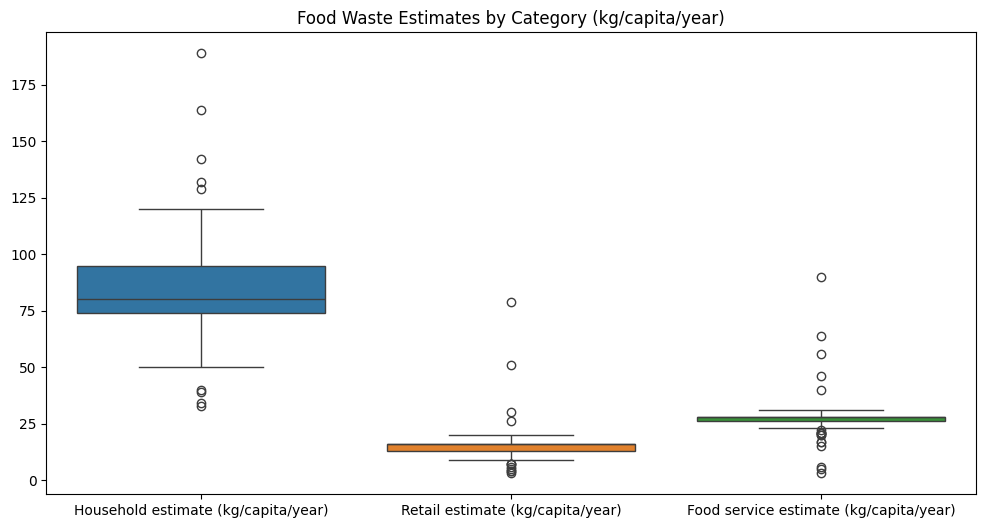

<ipython-input-3-1d9665cd14a0>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='combined figures (kg/capita/year)', data=df, ci=None)


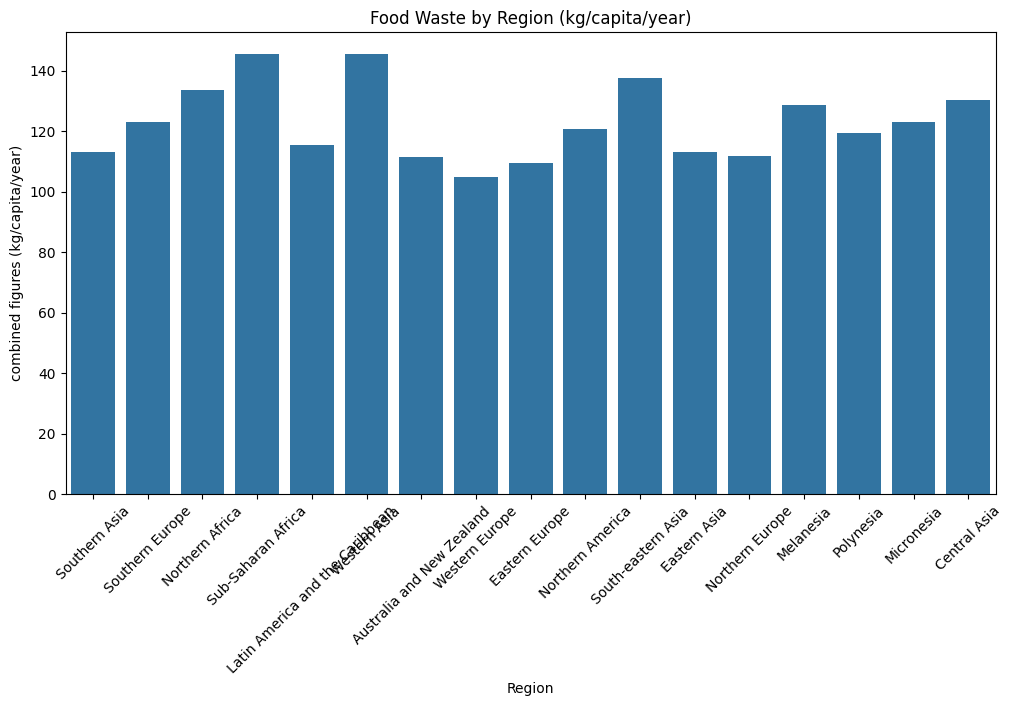

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize consumption and waste estimates for households, retail, and food service
def visualize_data(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[['Household estimate (kg/capita/year)',
                         'Retail estimate (kg/capita/year)',
                         'Food service estimate (kg/capita/year)']])
    plt.title('Food Waste Estimates by Category (kg/capita/year)')
    plt.show()

    # Regional distribution of combined food waste
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Region', y='combined figures (kg/capita/year)', data=df, ci=None)
    plt.title('Food Waste by Region (kg/capita/year)')
    plt.xticks(rotation=45)
    plt.show()

# Example call to visualize
visualize_data(df)



In [ ]:
import numpy as np

# Descriptive statistics for household, retail, and food service estimates
def descriptive_stats(df):
    stats = df[['Household estimate (kg/capita/year)',
                'Retail estimate (kg/capita/year)',
                'Food service estimate (kg/capita/year)']].describe()

    # Correlation matrix
    corr_matrix = df[['Household estimate (kg/capita/year)',
                      'Retail estimate (kg/capita/year)',
                      'Food service estimate (kg/capita/year)']].corr()

    # Display results
    print("Descriptive Statistics:")
    print(stats)

    print("\nCorrelation Matrix:")
    print(corr_matrix)

# Example call
descriptive_stats(df)


Descriptive Statistics:
       Household estimate (kg/capita/year)  Retail estimate (kg/capita/year)  \
count                           214.000000                        214.000000   
mean                             84.294393                         15.116822   
std                              18.313705                          5.767840   
min                              33.000000                          3.000000   
25%                              74.000000                         13.000000   
50%                              80.000000                         16.000000   
75%                              95.000000                         16.000000   
max                             189.000000                         79.000000   

       Food service estimate (kg/capita/year)  
count                              214.000000  
mean                                27.383178  
std                                  6.508420  
min                                  3.000000  
25%            

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Linear regression model to predict combined food waste
def linear_regression_model(df):
    X = df[['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)',
            'Food service estimate (kg/capita/year)']]
    y = df['combined figures (kg/capita/year)']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    # Display results
    print(f"Mean Absolute Error: {mae}")
    print(f"Predictions: {predictions[:5]}")  # Display first 5 predictions

    return model, predictions

# Example call
linear_regression_model(df)


Mean Absolute Error: 1.751570464896991e-14
Predictions: [133. 113. 115. 147. 115.]


(LinearRegression(),
 array([133., 113., 115., 147., 115., 111., 113., 124., 128., 118., 145.,
        132., 118., 145.,  84., 151., 130.,  97., 116., 116.,  88., 116.,
        148., 137., 116., 135., 147., 104.,  61., 112., 144., 147.,  75.,
        124., 135., 163., 147., 123., 116., 116., 141., 120., 124.]))

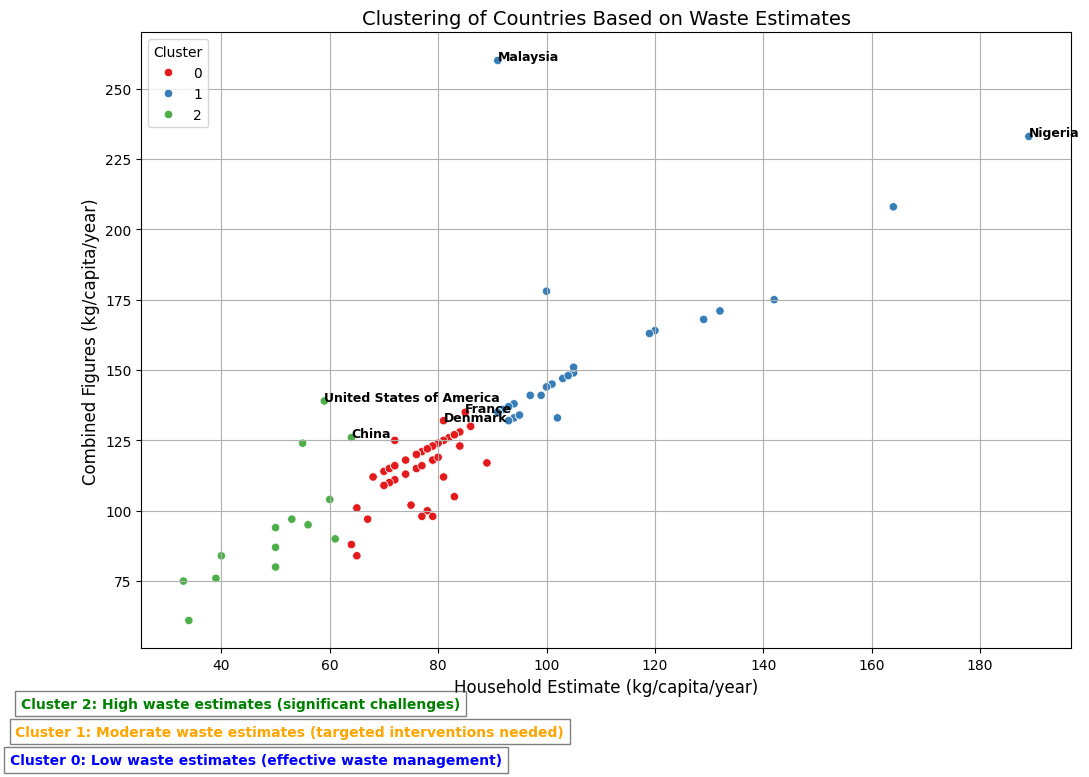

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def clustering_model_with_selected_names(df):
    # KMeans clustering
    kmeans = KMeans(n_clusters=3)
    df['Cluster'] = kmeans.fit_predict(df[['Household estimate (kg/capita/year)',
                                           'Retail estimate (kg/capita/year)',
                                           'Food service estimate (kg/capita/year)']])

    # Visualize the clustering results
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Household estimate (kg/capita/year)',
                    y='combined figures (kg/capita/year)',
                    hue='Cluster',
                    data=df,
                    palette='Set1')

    # Select prominent countries to annotate
    prominent_countries = {
        0: df[df['Cluster'] == 0].nlargest(2, 'combined figures (kg/capita/year)'),
        1: df[df['Cluster'] == 1].nlargest(2, 'combined figures (kg/capita/year)'),
        2: df[df['Cluster'] == 2].nlargest(2, 'combined figures (kg/capita/year)')
    }

    # Annotate points with selected country names
    for cluster, countries in prominent_countries.items():
        for _, row in countries.iterrows():
            plt.text(row['Household estimate (kg/capita/year)'],
                     row['combined figures (kg/capita/year)'],
                     row['Country'],
                     horizontalalignment='left',
                     color='black',
                     weight='semibold',
                     fontsize=9)  # Use fontsize instead of size

    # Adding cluster descriptions
    plt.text(1, 10, 'Cluster 0: Low waste estimates (effective waste management)',
             fontsize=10, color='blue', weight='bold', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(2, 20, 'Cluster 1: Moderate waste estimates (targeted interventions needed)',
             fontsize=10, color='orange', weight='bold', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(3, 30, 'Cluster 2: High waste estimates (significant challenges)',
             fontsize=10, color='green', weight='bold', bbox=dict(facecolor='white', alpha=0.5))

    plt.title('Clustering of Countries Based on Waste Estimates', fontsize=14)
    plt.xlabel('Household Estimate (kg/capita/year)', fontsize=12)
    plt.ylabel('Combined Figures (kg/capita/year)', fontsize=12)
    plt.legend(title='Cluster', loc='upper left')
    plt.grid(True)  # Optional: add grid for better readability
    plt.show()

# Example call
clustering_model_with_selected_names(df)


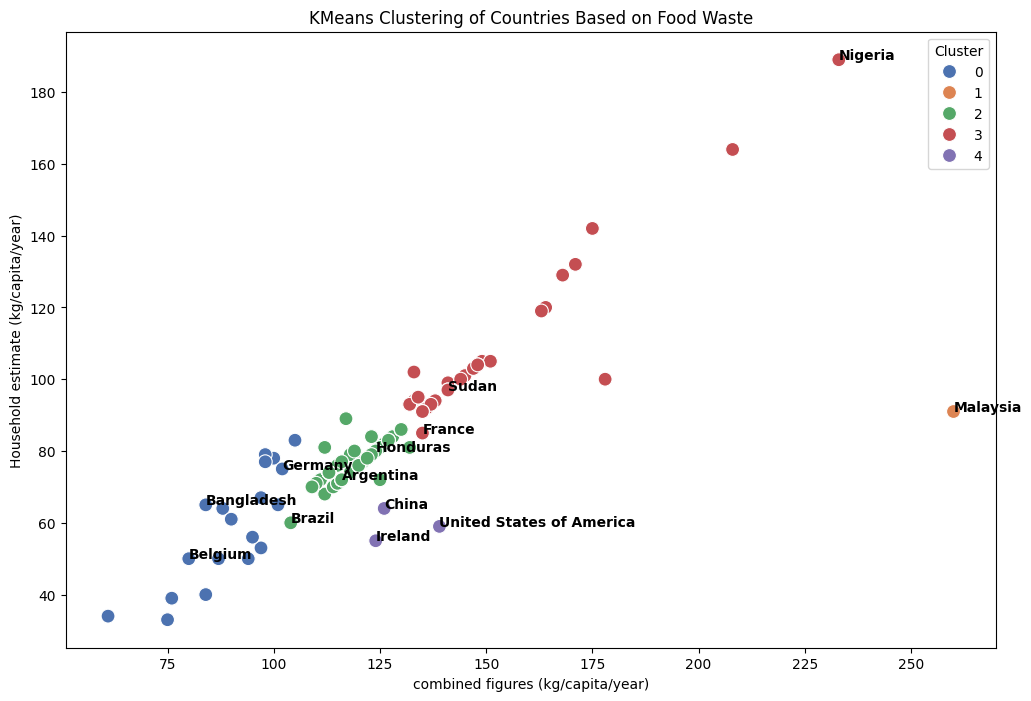

Countries with similar waste profiles to India: ['Austria', 'Bangladesh', 'Belgium', 'Belize', 'Estonia', 'Finland', 'Germany', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Russian Federation', 'Serbia', 'Slovenia', 'South Africa', 'United Kingdom']


['Austria',
 'Bangladesh',
 'Belgium',
 'Belize',
 'Estonia',
 'Finland',
 'Germany',
 'Italy',
 'Japan',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Russian Federation',
 'Serbia',
 'Slovenia',
 'South Africa',
 'United Kingdom']

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing (only keep relevant columns)
def preprocess_data(df):
    df_clean = df[['Country',
                   'combined figures (kg/capita/year)',
                   'Household estimate (kg/capita/year)',
                   'Retail estimate (kg/capita/year)',
                   'Food service estimate (kg/capita/year)']].dropna()

    # Standardize the numeric columns
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_clean.iloc[:, 1:])

    return df_clean, scaled_data

# Step 2: Apply KMeans Clustering
def apply_clustering(df_clean, scaled_data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_clean['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualize the clusters with country names
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(x=df_clean['combined figures (kg/capita/year)'],
                              y=df_clean['Household estimate (kg/capita/year)'],
                              hue=df_clean['Cluster'], palette="deep", s=100)

    plt.title("KMeans Clustering of Countries Based on Food Waste")

    # Annotate a few country names per cluster
    for cluster in df_clean['Cluster'].unique():
        # Select some countries from each cluster to annotate, limit to max 3
        cluster_data = df_clean[df_clean['Cluster'] == cluster]
        sample_data = cluster_data.sample(min(3, len(cluster_data)))  # Ensure not to sample more than available countries
        for i, row in sample_data.iterrows():
            plt.text(row['combined figures (kg/capita/year)'],
                     row['Household estimate (kg/capita/year)'],
                     row['Country'],
                     horizontalalignment='left',
                     size='medium',
                     color='black',
                     weight='semibold')

    plt.show()

    return df_clean

# Step 3: Recommender System based on Cluster
def recommender_system(df, country_name):
    country_data = df[df['Country'] == country_name]

    if country_data.empty:
        print(f"No data available for {country_name}")
        return []

    cluster = country_data['Cluster'].values[0]
    similar_countries = df[df['Cluster'] == cluster]['Country'].tolist()
    similar_countries.remove(country_name)

    print(f"Countries with similar waste profiles to {country_name}: {similar_countries}")
    return similar_countries

# Example of usage:
# Load your dataset (assuming df is already loaded)
df_clean, scaled_data = preprocess_data(df)
df_clustered = apply_clustering(df_clean, scaled_data, n_clusters=5)

# Get recommendations for a specific country
recommender_system(df_clustered, 'India')
